In [211]:
import pandas as pd
#read csv
df =pd.read_csv('data/adult.csv')
#head - 1st 5 rows
df.sample(90)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1830,21,State-gov,142766,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K
15914,58,Private,201393,Assoc-acdm,12,Divorced,Adm-clerical,Not-in-family,White,Male,0,1876,40,United-States,<=50K
14736,49,Private,153536,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,44,United-States,>50K
329,66,Private,127921,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,2050,0,55,United-States,<=50K
17556,25,Private,137645,Bachelors,13,Never-married,Sales,Not-in-family,Black,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,52,Self-emp-inc,51048,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
14541,20,?,43587,HS-grad,9,Married-spouse-absent,?,Not-in-family,White,Female,0,0,35,United-States,<=50K
18449,24,Private,230475,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K
7811,42,Private,136986,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [212]:

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [213]:
#Class uniq
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [214]:
#Missing value check
df.isnull().sum()
#No null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [215]:
#No mising values values 

In [216]:
#Duplicate check ,
df.duplicated().sum()

24

In [217]:
#24 duplicates so remove it
df = df.drop_duplicates()
#Duplicate again check and ensure those removed
df.duplicated().sum()

0

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  class           32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [219]:
#Drop Id column since it has no influence in results

In [220]:
df_back=df.copy()
#df=df.drop(labels=["Delivery_person_ID",  "ID"],axis=1)
#df.tail()
#df.sample(5)

In [221]:
#drop  columns Order_Date","Time_Orderd","Time_Order_picked since these are converted to int columns of HH MM SS
#df_back=df.copy()
#df=df.drop(labels=["Order_Date","Time_Orderd","Time_Order_picked"],axis=1)
#df.head()

In [222]:
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print(categorical_columns)
print(numerical_columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [223]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [224]:
df[numerical_columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [225]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32537 non-null  object
 1   education       32537 non-null  object
 2   marital-status  32537 non-null  object
 3   occupation      32537 non-null  object
 4   relationship    32537 non-null  object
 5   race            32537 non-null  object
 6   sex             32537 non-null  object
 7   native-country  32537 non-null  object
 8   class           32537 non-null  object
dtypes: object(9)
memory usage: 2.5+ MB


In [226]:
df[numerical_columns].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   fnlwgt          32537 non-null  int64
 2   education-num   32537 non-null  int64
 3   capital-gain    32537 non-null  int64
 4   capital-loss    32537 non-null  int64
 5   hours-per-week  32537 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


In [227]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [228]:
#Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df[i].unique())



workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex : [' Male' ' Female']
native-country : [' United-States' ' Cuba' ' Jam

In [229]:
#Replace ? with most occuring item
print('Bef replace ? workclass',df['workclass'].unique())
print('Bef replace ?  occupation',df['occupation'].unique())
print('Bef replace ?  native_country',df['native-country'].unique())

df['workclass']  = df['workclass'].str.replace("?","Private",regex=True)
df['occupation']  = df['occupation'].str.replace("?","Prof-specialty",regex=True)
df['native-country']  = df['native-country'].str.replace("?","United-States",regex=True)

print('############### after replace ? to most frequest value\n workclass',df['workclass'].unique())
print('occupation',df['occupation'].unique())
print('native-country',df['native-country'].unique())
 

Bef replace ? workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Bef replace ?  occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Bef replace ?  native_country [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
############### after rep

In [230]:
#Confirm the '? ' replaces with most occuring 
for i in categorical_columns:
    print(i,':',df[i].unique())

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex : [' Male' ' Female']
native-country : [' United-States' ' Cuba' ' Jamaica' ' In

In [231]:
#confirmed all ? replaced with mostly occuring char

In [232]:
#'NAN' is coming a value in many categories,so we will replace this with most occuering value
#df[categorical_columns]  = df[categorical_columns].replace("?","<br>")
#df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0]) 

In [233]:
#Store clean data 

import os
clean_csv=os.path.join('data','adult_clean.csv')
#column name correcting 
dict = {'education-num': 'education_num',
        'marital-status': 'marital_status',
        'capital-gain': 'capital_gain',
		'capital-loss': 'capital_loss',
		'hours-per-week': 'hours_per_week',
		'native-country': 'native_country',
		'class': 'Class',
		}
 
# call rename () method
df.rename(columns=dict,         inplace=True)
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Cat colums - renamed to _',categorical_columns)
print('Num colums - renamed to _',numerical_columns)
     








Cat colums - renamed to _ Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'Class'],
      dtype='object')
Num colums - renamed to _ Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [ ]:
#convert to numeiric for  'class'
#df['Class']=df['Class'].astype(int)
#print('cat column ',categorical_columns)
list=[]
for i in df['Class']:
    if " <=50K" in i:
        list.append(40000)
    elif " >50K" in df['Class']:
        list.append(60000)
    else:
       list.append(60000) 
df['Class']=list
#[' <=50K' ' >50K']

In [235]:
#Store cleaned csv 
df.to_csv(clean_csv,index=False)

In [240]:
#Testing the stored csv
df1=pd.read_csv(clean_csv)
df1.describe()
print('Info of stored Data to doubel check ',df1.info())
print('Just double check the stored dataframe by reading it  #######\n',df1.head(5))

#Stored csv check - Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df1[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  Class           32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
Info of stored Data to doubel check  None
Just double check the stored dataframe by reading i

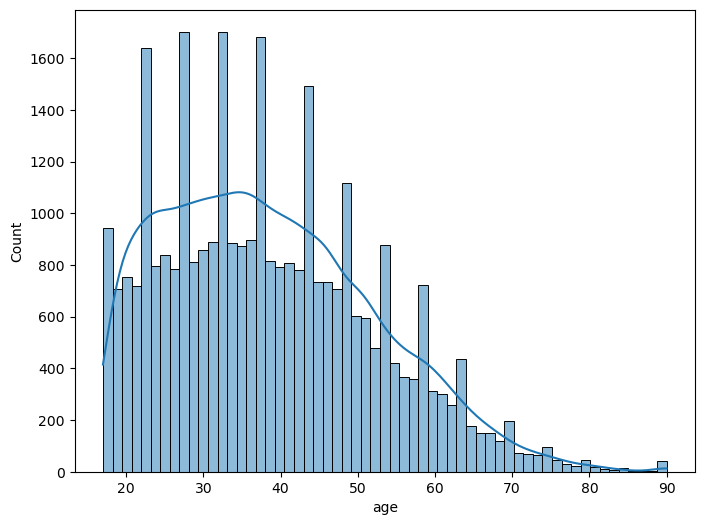

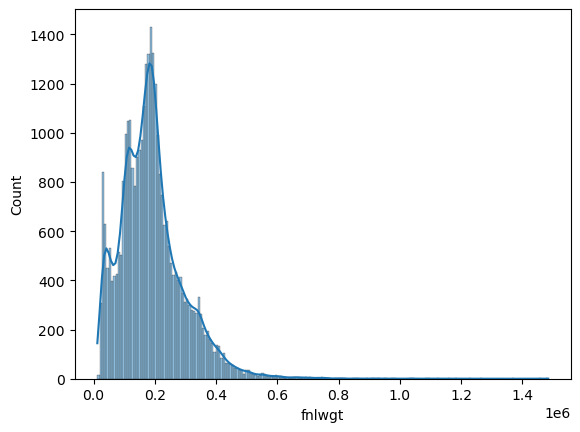

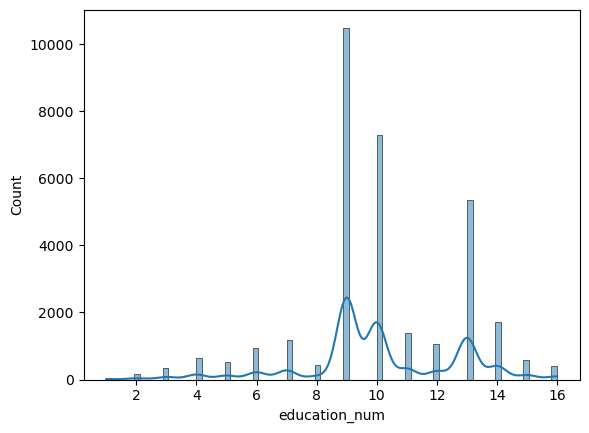

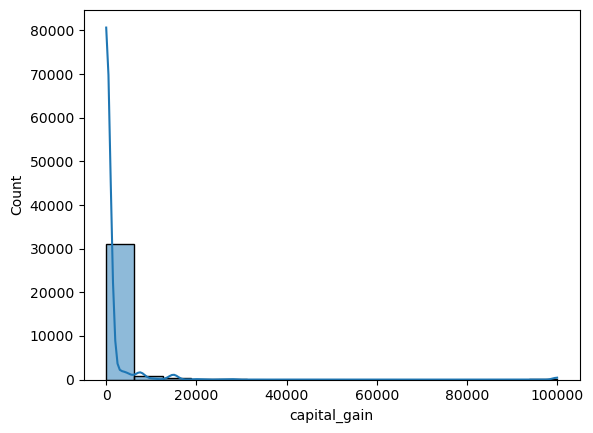

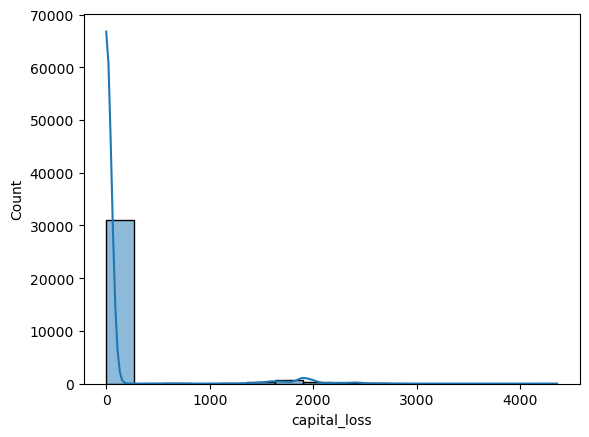

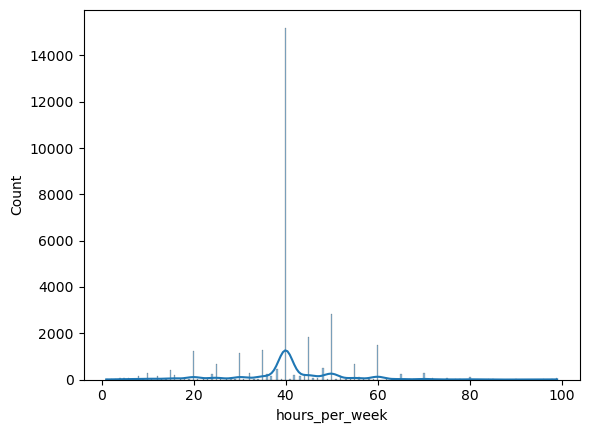

In [237]:
#Histogram for numerical  columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

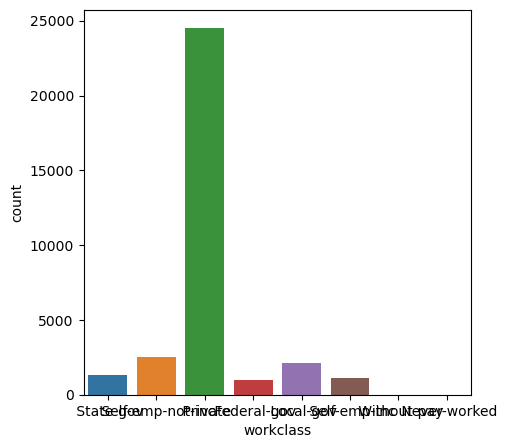

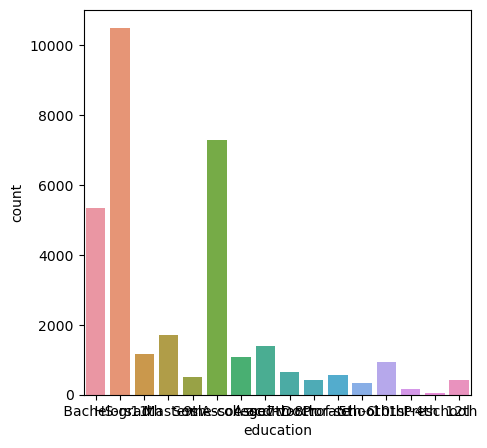

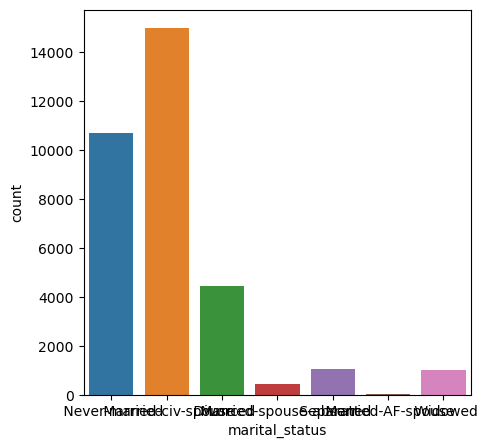

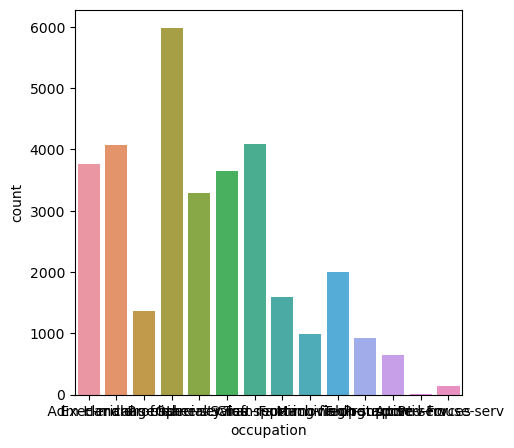

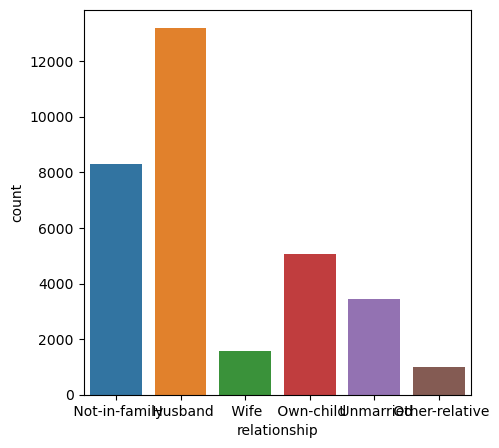

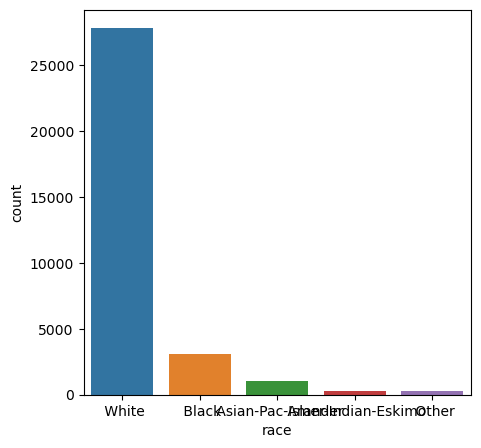

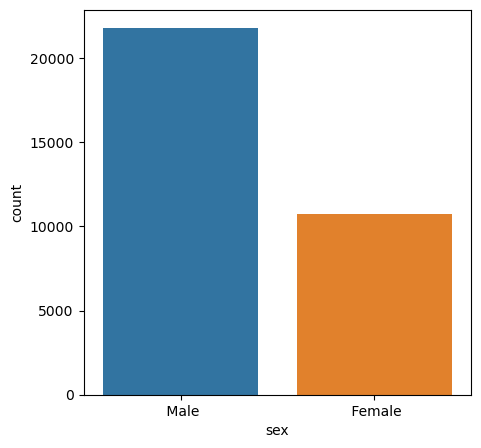

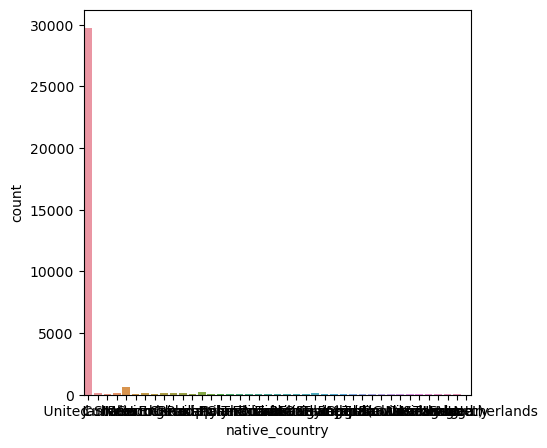

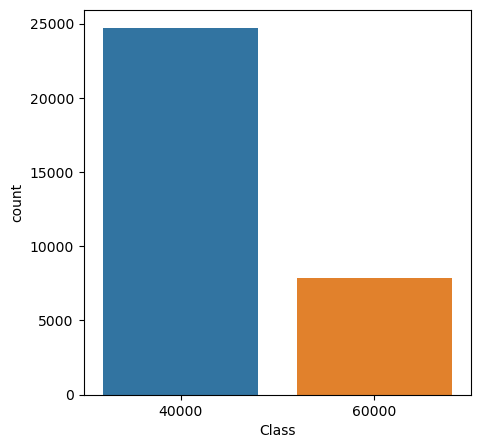

In [238]:
#Categorical Plots
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x =i, data = df)
    print('\n')
    plt.show()

In [239]:
#Strip plot - categorical columns
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(x =i, y ='class', data = df, jitter = True, dodge = True)
    print('\n')
    plt.show()

ValueError: Could not interpret value `class` for parameter `y`

<Figure size 500x500 with 0 Axes>

In [ ]:
#correlation
#sns.heatmap(df.corr(),annot=True)
#df.corr()
categorical_columns


In [ ]:
#df['cut'].value_counts()

In [ ]:
#cur_map={'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5}
#df['color'].value_counts()

In [ ]:
##color_map={'G':1,'E':2,'F':3,'H':4,'D':5,'I':6,'J':7}
#df['clarity'].value_counts()

In [ ]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
color_map= {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
df['clarity'].unique()
color_map={"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [ ]:
#map the dict fpr the categories to df
#df['color']=df['color'].map(color_map)
#df['clarity']=df['clarity'].map(clarity_map)
#df['cut']=df['cut'].map(cut_map)

In [ ]:
df.head()

In [ ]:
#correlation
df.corr()

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True,linewidths=.5)